In [1]:
from pathlib import Path

import anndata
import scanpy as sc
import pandas as pd
import seaborn as sns

import pollock
from pollock.models.model import PollockDataset, PollockModel, load_from_directory

specify which module to use for cell type predictions

In [2]:
module_filepath = '/models/snCCRCC_immune_annotated_v0.1.0'

download adata object here

it is also the same anndata object create here

In [3]:
adata = sc.read_h5ad('/data/single_cell_classification/tumor/gbm/gbm.h5ad')
adata

AnnData object with n_obs × n_vars = 111979 × 29032
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'sample', 'ident', 'cell_type', 'cell_type_short', 'cell_type_detailed', 'sample_id'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts'

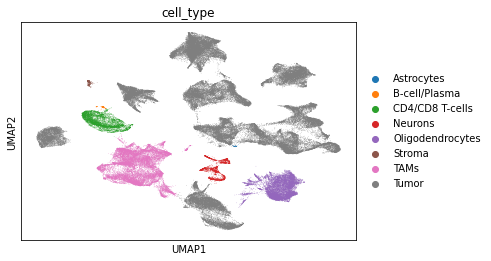

In [8]:
sc.pl.umap(adata, color=['cell_type'], save='_gbm.pdf')

In [4]:
# set(adata.X[:10].toarray().flatten())

create a new anndata object where raw counts are stored in .X

In [5]:
# prediction_adata = adata

create PollockDataset and load in module

In [9]:
loaded_pds, loaded_pm = load_from_directory(adata, module_filepath)

2020-07-16 23:35:51,837 normalizing counts for prediction
2020-07-16 23:35:51,837 filtering for genes in training set
2020-07-16 23:35:51,859 4506 genes in training set are missing from prediction set
/miniconda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
2020-07-16 23:36:03,926 scaling data


predict cell types

returns cell type labels, probability for the given cell type labels, and the probabilities of all cell types

In [10]:
labels, probs, cell_type_probs = loaded_pm.predict_pollock_dataset(loaded_pds, labels=True, )

df = pd.DataFrame.from_dict({
    'predicted_cell_type': labels,
    'cell_type_probability': probs,
})
df.index = adata.obs.index
df = pd.concat((df, pd.DataFrame(data=cell_type_probs, index=adata.obs.index,
                            columns=[f'probability_{c}' for c in loaded_pds.cell_types])), axis=1)
df

,predicted_cell_type,cell_type_probability,probability_B-cells,probability_Basophils,probability_CD4 CTL,probability_CD4 T-cells,probability_CD4 T-cells activated,probability_CD4 T-cells naive,probability_CD4/CD8 proliferating,probability_CD8 CTL,...,probability_Myofibroblasts,probability_NK cells strong,probability_NK cells weak,probability_Normal epithelial cells,probability_Plasma,probability_TRM,probability_Tregs,probability_Tumor cells,probability_cDC,probability_pDC
index,,,,,,,,,,,,,,,,,,,,,
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGCCACTCG,Fibroblasts,0.37,0.02,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.27,0.00,0.00,0.10,0.01,0.00,0.00,0.07,0.02,0.01
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGTGAATAC,Myofibroblasts,0.52,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.52,0.00,0.00,0.09,0.02,0.00,0.00,0.11,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGAACT,Fibroblasts,0.23,0.00,0.03,0.0,0.01,0.00,0.00,0.01,0.0,...,0.21,0.00,0.02,0.05,0.04,0.04,0.01,0.05,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGTTCC,Myofibroblasts,0.49,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.49,0.00,0.00,0.21,0.02,0.00,0.00,0.10,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCAGTCCTGTTC,Macrophages,0.88,0.00,0.02,0.0,0.00,0.00,0.00,0.00,0.0,...,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTAACATGA,Tumor cells,0.35,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.25,0.03,0.01,0.06,0.07,0.00,0.01,0.35,0.00,0.00
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTCATCACA,Myofibroblasts,0.39,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.39,0.01,0.01,0.06,0.06,0.00,0.00,0.14,0.01,0.01
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTTCTGACA,Fibroblasts,0.35,0.00,0.02,0.0,0.00,0.04,0.00,0.01,0.0,...,0.15,0.00,0.00,0.07,0.02,0.01,0.02,0.01,0.02,0.00


In [11]:
adata.obs = pd.merge(adata.obs, df, left_index=True, right_index=True)
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,sample,ident,...,probability_Myofibroblasts,probability_NK cells strong,probability_NK cells weak,probability_Normal epithelial cells,probability_Plasma,probability_TRM,probability_Tregs,probability_Tumor cells,probability_cDC,probability_pDC
index,,,,,,,,,,,,,,,,,,,,,
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGCCACTCG,C3L-03405_CPT0224600013_2019-12-20,1284.0,932,0.004673,2850.0,990,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.27,0.00,0.00,0.10,0.01,0.00,0.00,0.07,0.02,0.01
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGTGAATAC,C3L-03405_CPT0224600013_2019-12-20,32825.0,5934,0.001401,4050.0,1991,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.52,0.00,0.00,0.09,0.02,0.00,0.00,0.11,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGAACT,C3L-03405_CPT0224600013_2019-12-20,1297.0,874,0.044719,2814.0,924,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.21,0.00,0.02,0.05,0.04,0.04,0.01,0.05,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGTTCC,C3L-03405_CPT0224600013_2019-12-20,15036.0,4006,0.001264,4174.0,2046,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.49,0.00,0.00,0.21,0.02,0.00,0.00,0.10,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCAGTCCTGTTC,C3L-03405_CPT0224600013_2019-12-20,1585.0,1060,0.013249,3061.0,1068,1,1,C3L-03405_CPT0224600013_2019-12-20,1,...,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTAACATGA,C3N-03188_CPT0207030018_2019-11-13,10309.0,3952,0.000970,4210.0,2507,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.25,0.03,0.01,0.06,0.07,0.00,0.01,0.35,0.00,0.00
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTCATCACA,C3N-03188_CPT0207030018_2019-11-13,10783.0,4335,0.001577,4203.0,2671,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.39,0.01,0.01,0.06,0.06,0.00,0.00,0.14,0.01,0.01
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTTCTGACA,C3N-03188_CPT0207030018_2019-11-13,9852.0,3549,0.000914,4483.0,2514,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.15,0.00,0.00,0.07,0.02,0.01,0.02,0.01,0.02,0.00


In [12]:
list(adata.obs.columns)

['orig.ident',
 'nCount_RNA',
 'nFeature_RNA',
 'percent.mito',
 'nCount_SCT',
 'nFeature_SCT',
 'SCT_snn_res.0.5',
 'seurat_clusters',
 'sample',
 'ident',
 'cell_type',
 'cell_type_short',
 'cell_type_detailed',
 'sample_id',
 'predicted_cell_type',
 'cell_type_probability',
 'probability_B-cells',
 'probability_Basophils',
 'probability_CD4 CTL',
 'probability_CD4 T-cells',
 'probability_CD4 T-cells activated',
 'probability_CD4 T-cells naive',
 'probability_CD4/CD8 proliferating',
 'probability_CD8 CTL',
 'probability_CD8 CTL exhausted',
 'probability_CD8 T-cells preexhausted',
 'probability_Endothelial cells',
 'probability_Fibroblasts',
 'probability_Macrophages',
 'probability_Macrophages proliferating',
 'probability_Myofibroblasts',
 'probability_NK cells strong',
 'probability_NK cells weak',
 'probability_Normal epithelial cells',
 'probability_Plasma',
 'probability_TRM',
 'probability_Tregs',
 'probability_Tumor cells',
 'probability_cDC',
 'probability_pDC']

In [13]:
adata.obs['annotated_cell_type'] = adata.obs['cell_type'].to_list()

... storing 'predicted_cell_type' as categorical
... storing 'annotated_cell_type' as categorical


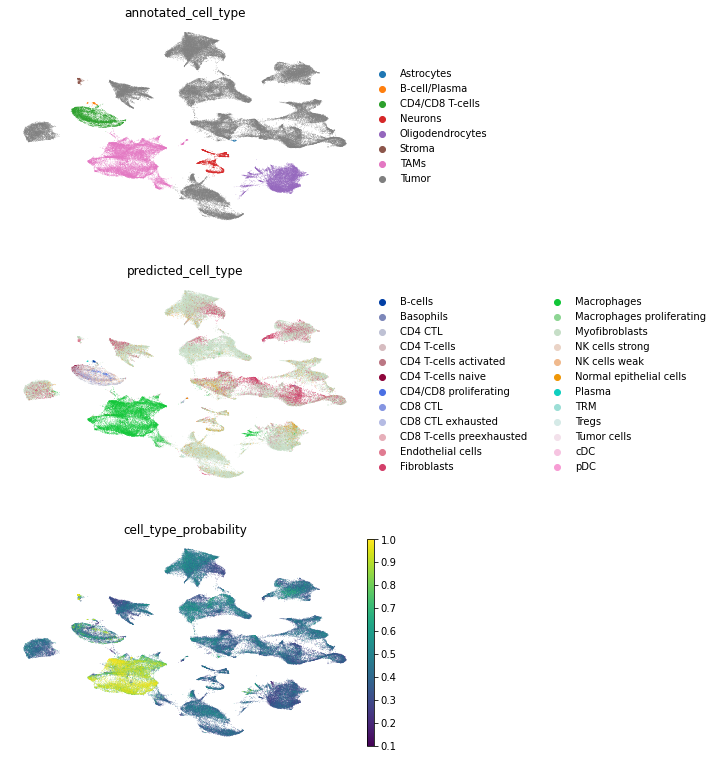

In [14]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

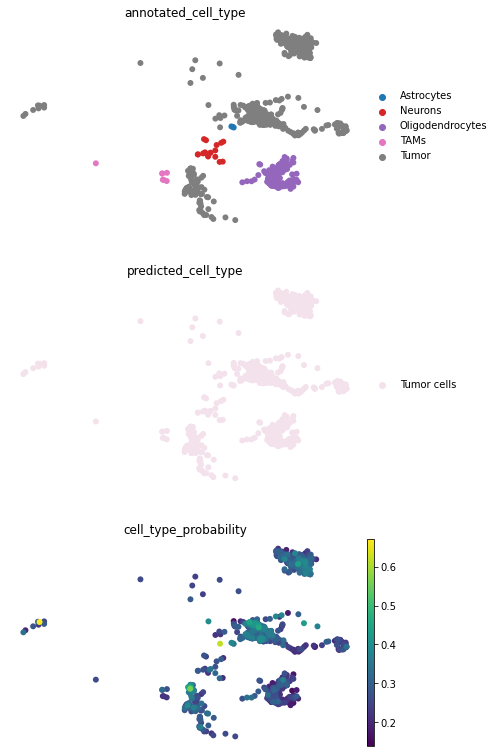

In [15]:
sc.pl.umap(adata[adata.obs['predicted_cell_type']=='Tumor cells'],
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

## visualization of cell embeddings

with pollock we can also visualize the latent space created by the BVAE

here we take the emb

In [16]:
cell_embeddings = loaded_pm.get_cell_embeddings(loaded_pds.prediction_ds)
cell_embeddings.shape, cell_embeddings

((111979, 25),
 array([[ 0.97979164,  2.7672503 , -1.0798024 , ...,  0.73511684,
          1.8200827 , -1.6809617 ],
        [ 1.4988452 ,  3.1974075 , -2.48338   , ...,  1.20188   ,
          2.1912894 , -1.2509024 ],
        [ 1.246955  ,  2.2915032 , -0.9454213 , ...,  0.634927  ,
          1.6157118 , -1.5422844 ],
        ...,
        [ 2.806885  ,  2.259467  , -1.1953683 , ...,  0.12241931,
          3.1677387 , -1.6030359 ],
        [ 2.9040968 ,  2.7355158 , -1.4737177 , ...,  2.1572506 ,
          2.3219576 , -1.6714801 ],
        [ 1.3231995 ,  1.4151576 , -1.4339747 , ...,  0.85718757,
          1.4930567 , -0.61679906]], dtype=float32))

In [17]:
adata.obsm['cell_embeddings'] = cell_embeddings

replace pca generated nearest neighbor and umap with cell embedding generated one

In [18]:
sc.pp.neighbors(adata, use_rep='cell_embeddings')
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1, save='_pollock_overall_cell_types.pdf')

In [ ]:
filtered = adata[adata.obs['annotated_cell_type']=='CD4/CD8 T-cells']
mask = [True if 'CD' in ct or 'Treg' in ct or 'NK' in ct else False
       for ct in filtered.obs['predicted_cell_type']]
filtered = filtered[mask]

sc.pl.umap(filtered,
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability',
                 'PDCD1'], color_map='Reds',
          frameon=False, ncols=1, save='_T_cells.pdf')

In [ ]:
sc.settings.figdir = '/models/figures/'

In [ ]:
marker_map = {
    'T cell': ['CD3G'],
    'CD4': ['CD4'],
    'CD8': ['CD8A'],
    'proliferating': ['MKI67'],
    'NK': ['GNLY'],
    'Treg': ['FOXP3'],
    'Exausted': ['PDCD1', 'LAG3'],
    'Naive': ['IL7R'],
    'Activated': ['CD69', 'CD28']
}

sc.pl.dotplot(filtered, var_names=marker_map, log=True,
              groupby='predicted_cell_type', save='_GMB_immune_transfer_T_cell_markers.pdf')

In [ ]:
sc.pl.heatmap(filtered, var_names=['CD4', 'CD8A', 'CD3G', 'IL7R', 'CD69', 'CD28', 'GZMB', 'GNLY', 'MKI67', 'FOXP3',
                                  'FASLG', 'PDCD1'],
              groupby='predicted_cell_type', log=True)

In [ ]:
sorted(set(adata.obs['predicted_cell_type']))

In [ ]:
# filtered = adata[adata.obs['annotated_cell_type']=='TAMs']
filtered = adata[adata.obs['annotated_cell_type']!='Tumor']
# filtered = adata.copy()
mask = [True if 'Macro' in ct or 'DC' in ct or 'B-' in ct else False
       for ct in filtered.obs['predicted_cell_type']]
filtered = filtered[mask]

sc.pl.umap(filtered,
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability', 'MKI67'], color_map='Reds',
          frameon=False, ncols=1, save='_monocyte-bcell.pdf')

In [ ]:
marker_map = {
    'B-cell': ['MS4A1'],
    'Macrophage': ['CD14', 'FCGR3A', 'CD68', 'CD163'],
    'Proliferating': ['MKI67'],
    'cDC': ['ITGAX'],
    'pDC': ['IL3RA']
}

sc.pl.dotplot(filtered, var_names=marker_map, log=True,
              groupby='predicted_cell_type', save='_GMB_immune_transfer_monocyte_markers.pdf')

In [ ]:
# filtered = adata[adata.obs['annotated_cell_type']=='Stroma']
# filtered = adata.copy()
# mask = [True if 'Macro' in ct or 'DC' in ct else False
#        for ct in filtered.obs['predicted_cell_type']]
# filtered = filtered[mask]

sc.pl.umap(filtered,
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability', 'ACTA2'], color_map='Reds',
          frameon=False, ncols=1)

In [27]:
loaded_pds, loaded_pm = load_from_directory(adata.copy(), '/models/modules/pdac_caf_filtered_v0.1.0/')

2020-07-16 23:48:22,321 normalizing counts for prediction
2020-07-16 23:48:22,322 filtering for genes in training set
2020-07-16 23:48:22,332 1355 genes in training set are missing from prediction set
/miniconda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
2020-07-16 23:48:34,577 scaling data


In [30]:
labels, probs, cell_type_probs = loaded_pm.predict_pollock_dataset(loaded_pds, labels=True, )

df = pd.DataFrame.from_dict({
    'predicted_cell_type': labels,
    'cell_type_probability': probs,
})
df.index = adata.obs.index
df = pd.concat((df, pd.DataFrame(data=cell_type_probs, index=adata.obs.index,
                            columns=[f'probability_{c}' for c in loaded_pds.cell_types])), axis=1)
df

,predicted_cell_type,cell_type_probability,probability_apCAF,probability_iCAF,probability_myCAF
index,,,,,
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGCCACTCG,iCAF,0.52,0.30,0.52,0.18
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGTGAATAC,iCAF,0.50,0.34,0.50,0.16
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGAACT,iCAF,0.51,0.35,0.51,0.14
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGTTCC,apCAF,0.51,0.51,0.33,0.16
C3L-03405_CPT0224600013_2019-12-20_AAACCCAGTCCTGTTC,iCAF,0.54,0.29,0.54,0.17
...,...,...,...,...,...
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTAACATGA,iCAF,0.45,0.41,0.45,0.14
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTCATCACA,apCAF,0.42,0.42,0.39,0.19
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTTCTGACA,iCAF,0.52,0.33,0.52,0.15


In [31]:
adata.obs = pd.merge(adata.obs, df, left_index=True, right_index=True)
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,sample,ident,...,probability_Tregs,probability_Tumor cells,probability_cDC,probability_pDC,annotated_cell_type,predicted_cell_type_y,cell_type_probability_y,probability_apCAF,probability_iCAF,probability_myCAF
index,,,,,,,,,,,,,,,,,,,,,
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGCCACTCG,C3L-03405_CPT0224600013_2019-12-20,1284.0,932,0.004673,2850.0,990,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.00,0.07,0.02,0.01,Tumor,iCAF,0.52,0.30,0.52,0.18
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGTGAATAC,C3L-03405_CPT0224600013_2019-12-20,32825.0,5934,0.001401,4050.0,1991,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.00,0.11,0.01,0.00,Tumor,iCAF,0.50,0.34,0.50,0.16
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGAACT,C3L-03405_CPT0224600013_2019-12-20,1297.0,874,0.044719,2814.0,924,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.01,0.05,0.01,0.00,Tumor,iCAF,0.51,0.35,0.51,0.14
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGTTCC,C3L-03405_CPT0224600013_2019-12-20,15036.0,4006,0.001264,4174.0,2046,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.00,0.10,0.01,0.00,Tumor,apCAF,0.51,0.51,0.33,0.16
C3L-03405_CPT0224600013_2019-12-20_AAACCCAGTCCTGTTC,C3L-03405_CPT0224600013_2019-12-20,1585.0,1060,0.013249,3061.0,1068,1,1,C3L-03405_CPT0224600013_2019-12-20,1,...,0.00,0.00,0.00,0.00,TAMs,iCAF,0.54,0.29,0.54,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTAACATGA,C3N-03188_CPT0207030018_2019-11-13,10309.0,3952,0.000970,4210.0,2507,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.01,0.35,0.00,0.00,Tumor,iCAF,0.45,0.41,0.45,0.14
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTCATCACA,C3N-03188_CPT0207030018_2019-11-13,10783.0,4335,0.001577,4203.0,2671,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.00,0.14,0.01,0.01,Tumor,apCAF,0.42,0.42,0.39,0.19
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTTCTGACA,C3N-03188_CPT0207030018_2019-11-13,9852.0,3549,0.000914,4483.0,2514,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.02,0.01,0.02,0.00,Tumor,iCAF,0.52,0.33,0.52,0.15


In [28]:
cell_embeddings = loaded_pm.get_cell_embeddings(loaded_pds.prediction_ds)
cell_embeddings.shape, cell_embeddings

((111979, 25),
 array([[-0.52293664,  0.36669526, -0.29783934, ..., -0.7785057 ,
          0.74902964, -0.5047445 ],
        [-0.62912333,  0.23096488, -0.22022848, ..., -0.52636474,
          1.2774915 , -1.2325726 ],
        [-0.16130108,  0.37464148, -0.29618588, ..., -0.28608346,
          0.793914  , -0.8938934 ],
        ...,
        [-0.12067196,  0.62015676, -0.9283518 , ..., -0.87215674,
          1.148999  , -0.86618954],
        [-0.4609011 ,  0.33417886, -0.39953554, ..., -0.40981486,
          1.1136078 , -0.768867  ],
        [ 0.13187563,  0.1532515 , -0.29989195, ..., -0.3994701 ,
          0.4831816 , -0.7495333 ]], dtype=float32))

In [32]:
adata.obsm['cell_embeddings'] = cell_embeddings

In [33]:
sc.pp.neighbors(adata, use_rep='cell_embeddings')
sc.tl.umap(adata)

In [35]:
sorted(adata.obs.columns)

['SCT_snn_res.0.5',
 'annotated_cell_type',
 'cell_type',
 'cell_type_detailed',
 'cell_type_probability_x',
 'cell_type_probability_y',
 'cell_type_short',
 'ident',
 'nCount_RNA',
 'nCount_SCT',
 'nFeature_RNA',
 'nFeature_SCT',
 'orig.ident',
 'percent.mito',
 'predicted_cell_type_x',
 'predicted_cell_type_y',
 'probability_B-cells',
 'probability_Basophils',
 'probability_CD4 CTL',
 'probability_CD4 T-cells',
 'probability_CD4 T-cells activated',
 'probability_CD4 T-cells naive',
 'probability_CD4/CD8 proliferating',
 'probability_CD8 CTL',
 'probability_CD8 CTL exhausted',
 'probability_CD8 T-cells preexhausted',
 'probability_Endothelial cells',
 'probability_Fibroblasts',
 'probability_Macrophages',
 'probability_Macrophages proliferating',
 'probability_Myofibroblasts',
 'probability_NK cells strong',
 'probability_NK cells weak',
 'probability_Normal epithelial cells',
 'probability_Plasma',
 'probability_TRM',
 'probability_Tregs',
 'probability_Tumor cells',
 'probability_ap

In [38]:
adata.obs['predicted_cell_type'] = adata.obs['predicted_cell_type_y'].to_list()
adata.obs['cell_type_probability'] = adata.obs['cell_type_probability_y'].to_list()

/miniconda/lib/python3.7/site-packages/anndata/_core/anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'predicted_cell_type_y' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'predicted_cell_type' as categorical


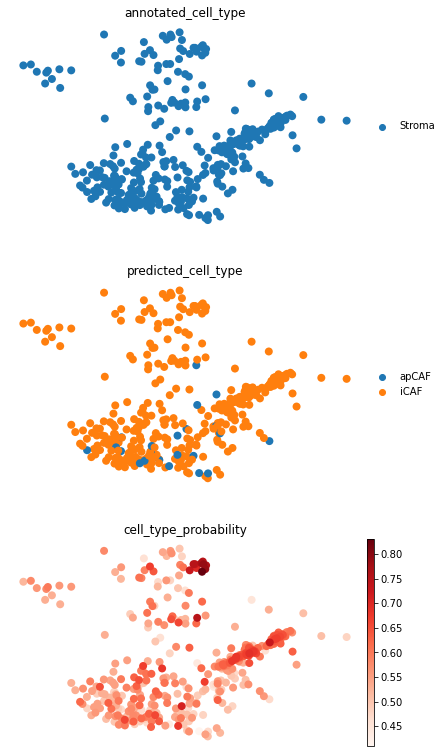

In [39]:
# filtered = adata[adata.obs['annotated_cell_type']=='TAMs']
filtered = adata[adata.obs['annotated_cell_type']=='Stroma']
# filtered = adata.copy()
# mask = [True if 'Macro' in ct or 'DC' in ct or 'B-' in ct else False
#        for ct in filtered.obs['predicted_cell_type']]
# filtered = filtered[mask]

sc.pl.umap(filtered,
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'], color_map='Reds',
          frameon=False, ncols=1, save='_caf.pdf')

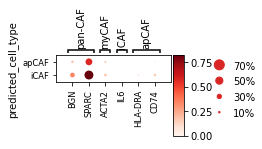

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[2.0999999999999996, 0, 0.2, 0.5, 0.25])

In [40]:
marker_map = {
    'pan-CAF': ['BGN', 'SPARC'],
    'myCAF': ['ACTA2'],
    'iCAF': ['IL6'],
    'apCAF': ['HLA-DRA', 'CD74']
}

sc.pl.dotplot(filtered, var_names=marker_map, log=True,
              groupby='predicted_cell_type', save='_GMB_immune_transfer_caf_markers.pdf')